<a href="https://colab.research.google.com/github/nneia/Python-for-Data-Science-and-AI/blob/main/%22Assignment_2_CNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification using CNN

The goal of this exercise is to train a convolutional neural network on MNIST and better understand what is happening during training.

This is not training MLP and it is different! Infact, both MLP and CNN can be used for Image classification however MLP takes vector as input and CNN takes tensor (represent deep learning data. They are multidimensional arrays, used to store multiple dimensions of a dataset.) as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images CNN will perform better than MLP.

## Training a CNN on MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.14.0


**Tip:** CNNs are much slower to train on CPU than the DNN of the last exercise. It is feasible to do this exercise on a normal computer, but if you have a Google account, we suggest to use `colab` to run this notebook on a GPU **for free** (training time should be divided by a factor 5 or so).

Go then in the menu, "Runtime" and "Change Runtime type". You can then change the "Hardware accelerator" to GPU. Do not choose TPU, it will be as slow as CPU for the small networks we are using.

We import and normalize the MNIST data like last time, except we do not reshape the images: they stay with the shape (28, 28, 1):

In [2]:
# Fetch the MNIST data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

# Normalize the values
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Mean removal
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

# One-hot encoding
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

11490434/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


We can now define the CNN defined in the first image:

* a convolutional layer with 16 3x3 filters, using valid padding and ReLU transfer functions,
* a max-pooling layer over 2x2 regions,
* a fully-connected layer with 100 ReLU neurons,
* a softmax layer with 10 neurons.

The CNN will be trained on MNIST using SGD with momentum.

The following code defines this basic network in keras:

In [5]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

Note the use of `Flatten()` to transform the 13x13x16 tensor representing the max-pooling layer into a vector of 2704 elements.

Note also the use of `padding='valid'` and its effect on the size of the tensor corresponding to the convolutional layer. Change it to `padding='same'` and conclude on its effect.

**Q:** Which layer has the most parameters? Why? Compare with the fully-connected MLPs you obtained during exercise 5.

The layer with the most parameters is the Dense Layer with 270,500 parameters. This is expected because dense layers connect every neuron to every neuron in the previous and next layers, resulting in a large number of weights.
Compared to fully-connected MLPs obtained during Exercise 5, convolutional layers have fewer parameters due to weight sharing and local connectivity.

Let's now train this network on MNIST for 10 epochs, using minibatches of 64 images:

In [6]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
844/844 [==============================] - 19s 22ms/step - loss: 0.1713 - accuracy: 0.9485 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 2/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0664 - val_accuracy: 0.9808
Epoch 3/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0666 - val_accuracy: 0.9842
Epoch 4/10
844/844 [==============================] - 19s 22ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0674 - val_accuracy: 0.9837
Epoch 5/10
844/844 [==============================] - 18s 22ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0669 - val_accuracy: 0.9885
Epoch 6/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0699 - val_accuracy: 0.9853
Epoch 7/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0652 - val_accuracy:

As in the previous exercise, the next cells compute the test loss and accuracy and display the evolution of the training and validation accuracies:

In [7]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09434067457914352
Test accuracy: 0.9824000000953674


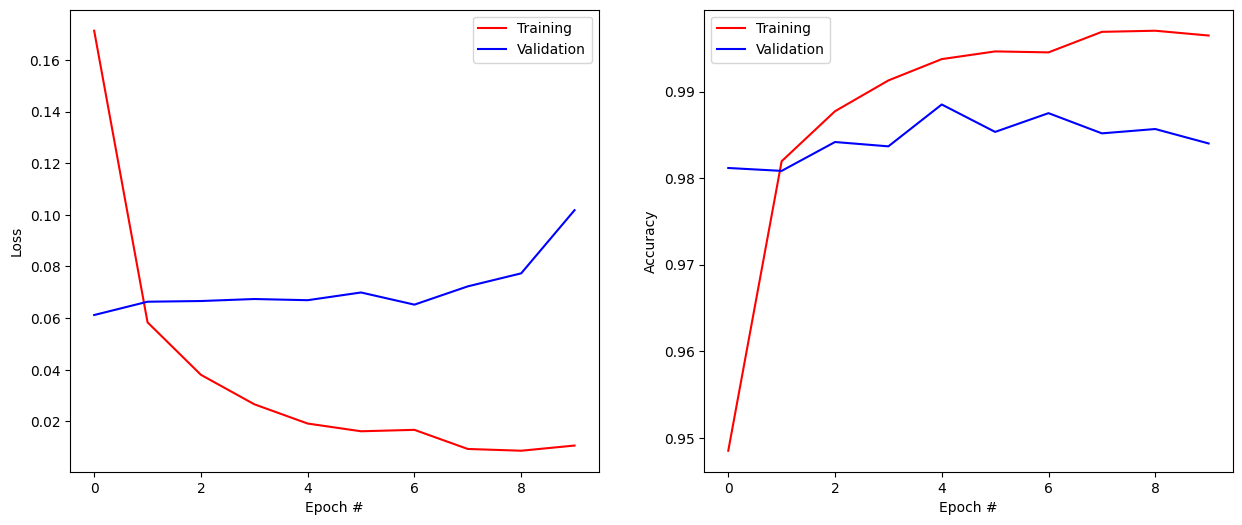

In [8]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Assignments

* Answer the following questions:
* The deadline is December 12th. Please bring your solutions to class.

**Q:** What do you think of 1) the final accuracy and 2) the training time, compared to the MLP of last time?

**Q:** When does your network start to overfit? How to recognize it?

**Q:** Try different values for the batch size (16, 32, 64, 128..). What is its influence?

ANSWER: The final accuracy of approximately 98.24% is quite good, indicating that the convolutional neural network (CNN) performed well on the MNIST dataset. It outperforms the MLP of last time, as MLPs may struggle with capturing spatial relationships in images, and CNNs are designed to handle such data more effectively.
The training time for CNNs is generally longer compared to MLPs because of the increased complexity, especially with convolutional and pooling layers.

Smaller batch sizes (e.g., 16, 32) may lead to faster convergence but might be noisy, and the model might be sensitive to the specific examples in the batch.

Larger batch sizes (e.g., 64, 128) may provide more stable updates but can slow down convergence and may lead to a slightly worse generalization.

**Q:** Improve the CNN to avoid overfitting. The test accuracy should be around 99%.

You can:

* change the learning rate
* add another block on convolution + max-pooling before the fully-connected layer to reduce the number of parameters,
* add dropout after some of the layers,
* use L2 regularization,
* use a different optimizer,
* do whatever you want.

**Beware:** training is now relatively slow, keep your number of tries limited. Once you find a good architecture that does not overfit, train it for 20 epochs and proceed to the next questions.

Epoch 1/20
422/422 [==============================] - 81s 189ms/step - loss: 0.2375 - accuracy: 0.9268 - val_loss: 0.0531 - val_accuracy: 0.9845
Epoch 2/20
422/422 [==============================] - 79s 188ms/step - loss: 0.0741 - accuracy: 0.9764 - val_loss: 0.0423 - val_accuracy: 0.9882
Epoch 3/20
422/422 [==============================] - 79s 187ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 4/20
422/422 [==============================] - 80s 189ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 5/20
422/422 [==============================] - 80s 190ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0298 - val_accuracy: 0.9920
Epoch 6/20
422/422 [==============================] - 79s 188ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0283 - val_accuracy: 0.9920
Epoch 7/20
422/422 [==============================] - 78s 184ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0255 - val_ac

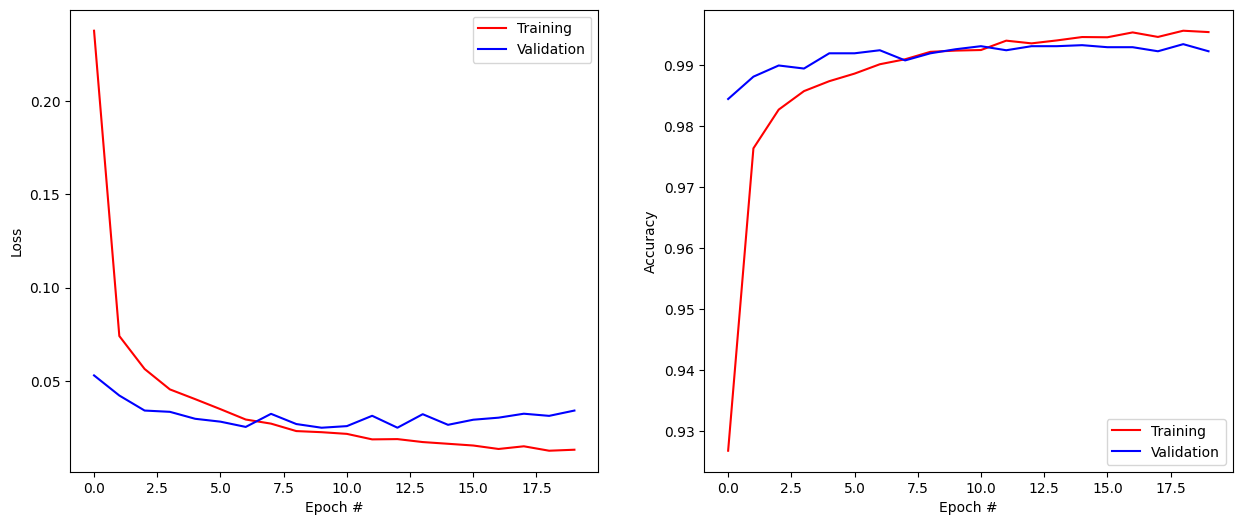

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess MNIST data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

# Clear previous TensorFlow session
tf.keras.backend.clear_session()

# Define the improved CNN model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

history = model.fit(
    X_train, T_train,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.History()]
)

score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# **What I did to increase the accuracy and avoided overfitting:**
**Increased Model Complexity:**

Added an additional convolutional layer with more filters (64 filters) to capture more complex features.
Increased the number of neurons in the dense layer (512 neurons).

**Padding and Pooling:**

Used 'same' padding in convolutional layers to retain more spatial information.
Applied max-pooling after each convolutional layer to reduce spatial dimensions and extract essential features.

**Regularization:**

Added dropout layers after each pooling layer and the dense layer to prevent overfitting.
Adjusted dropout rates to control the amount of regularization (dropout rate of 0.25 in convolutional layers and 0.5 in the dense layer).

**Optimization:**

Switched to the Adam optimizer with a learning rate of 0.001, which often performs well and adapts to the learning dynamics.

**Model Training:**

Trained the model for 20 epochs to allow for more learning.
Used a larger batch size (128) to stabilize the training process

## Analysing the CNN

Once a network has been trained, let's see what has happened internally.

### Accessing trained weights

Each layer of the network can be addressed individually. For example, `model.layers[0]` represents the first layer of your network (the first convolutional one, as the input layer does not count). The index of the other layers can be found by looking at the output of `model.summary()`.

You can obtain the parameters of each layer (if any) with:

```python
W = model.layers[0].get_weights()[0]
```

**Q:** Print the shape of these weights and relate them to the network.

In [14]:
weights_first_layer = model.layers[0].get_weights()[0]

print("Shape of weights in the first layer:", weights_first_layer.shape)
model.summary()


Shape of weights in the first layer: (3, 3, 1, 32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 drop

**Q:** Visualize with `imshow()` each of the 16 filters of the first convolutional layer. Interpret what kind of operation they perform on the image.

*Hint:* `subplot()` is going to be useful here. If you have 16 images `img[i]`, you can visualize them in a 4x4 grid with:

```python
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(img[i], cmap=plt.cm.gray)
```

Shape of the weights: (3, 3, 1, 32)
Transpose successful.


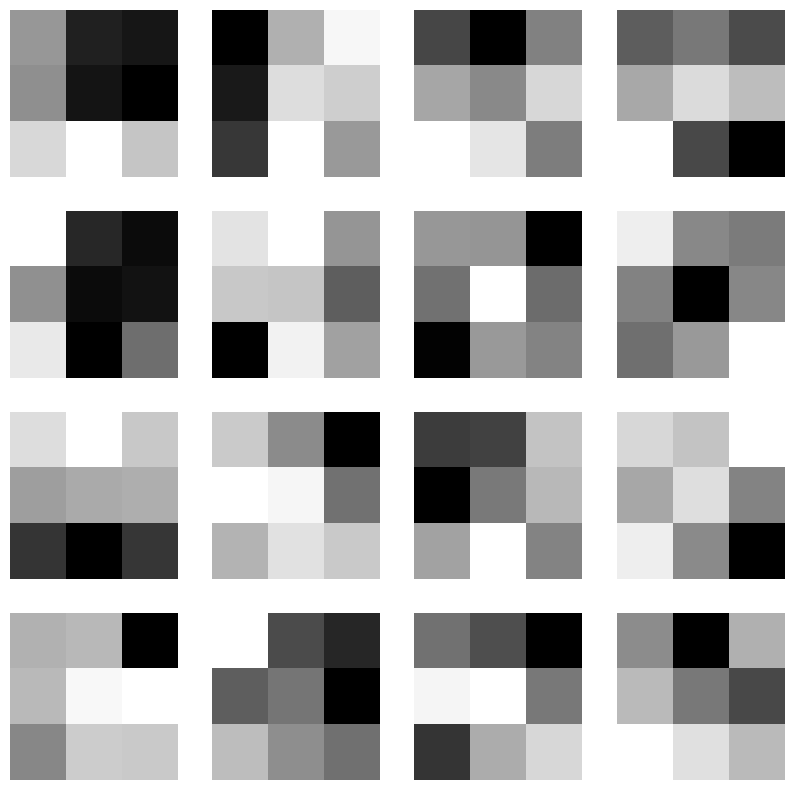

In [20]:
import matplotlib.pyplot as plt

# Access the weights of the first layer
weights_first_layer = model.layers[0].get_weights()[0]

# Print the shape of the weights
print("Shape of the weights:", weights_first_layer.shape)

# Reshape the weights to (3, 3, 1, 16) for 3x3 filters with 1 channel and 16 filters
try:
    weights_first_layer = weights_first_layer.transpose(3, 2, 0, 1)
    print("Transpose successful.")
except ValueError:
    print("Transpose failed. Check the expected shape.")

# Create a subplot for each filter
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(weights_first_layer[i, 0], cmap='gray')
    plt.axis('off')

plt.show()



### Visualizing the feature maps

Let's take a random image from the training set and visualize it:

1


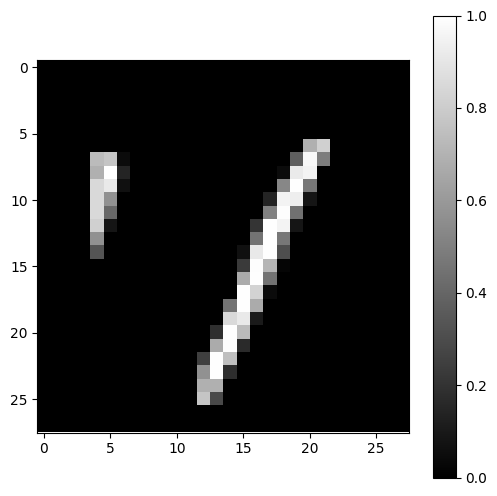

In [24]:
idx = 31727 # or any other digit
x = X_train[idx, :, :, :].reshape(1, 28, 28, 1)
t = t_train[idx]

print(t)

plt.figure(figsize=(6, 6))
plt.imshow(x[0, :, :, 0] + X_mean[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

This example could be a 1 or 7. That is why you will never get 100% accuracy on MNIST: some examples are hard even for humans...

**Q:** Print what the model predict for it, its true label, and visualize the probabilities in the softmax output layer (look at the doc of `model.predict()`):

In [26]:
# Make predictions using the model
predictions = model.predict(x)

# Print the model's prediction and probabilities
predicted_class = np.argmax(predictions)
print("Model prediction:", predicted_class)
print("Probabilities in the softmax output layer:")
print(predictions)


1/1 [==============================] - 0s 22ms/step
Model prediction: 1
Probabilities in the softmax output layer:
[[2.3916172e-08 9.9619150e-01 3.6052694e-07 2.2546711e-08 2.1670096e-05
  6.2834651e-12 1.1825913e-08 3.7862365e-03 1.4515864e-07 1.1282459e-10]]


Depending on how your network converged, you may have the correct prediction or not.

**Q:** Visualize the output of the network for different examples. Do these ambiguities happen often?

1/1 [==============================] - 0s 133ms/step


ValueError: ignored

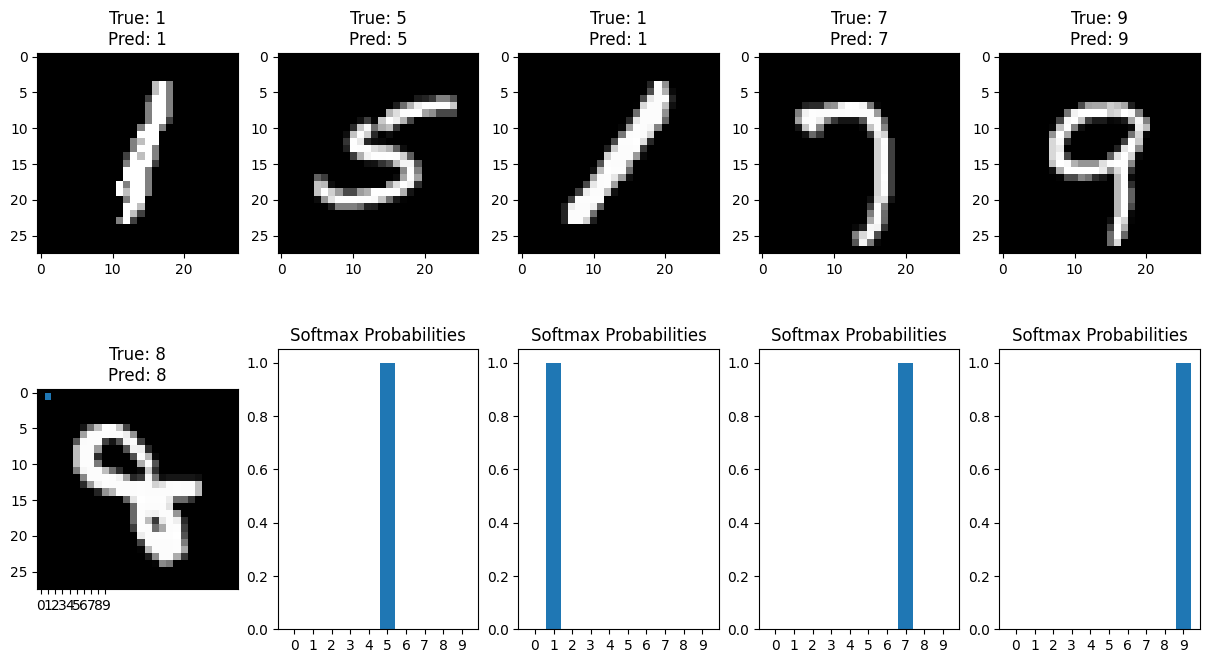

In [28]:
# Visualize the output of the network for different examples
plt.figure(figsize=(15, 8))

for i in range(10):
    # Take a random image from the test set
    idx = np.random.randint(0, len(X_test))
    x = X_test[idx, :, :, :].reshape(1, 28, 28, 1)
    t = t_test[idx]

    # Make predictions using the model
    predictions = model.predict(x)

    # Plot the input image
    plt.subplot(2, 5, i+1)
    plt.imshow(x[0, :, :, 0] + X_mean[:, :, 0], cmap=plt.cm.gray)
    plt.title(f'True: {t}\nPred: {np.argmax(predictions)}')

    # Plot the softmax probabilities
    plt.subplot(2, 5, i+1+5)  # Fix the subplot indexing
    plt.bar(range(10), predictions.flatten(), tick_label=range(10))
    plt.title('Softmax Probabilities')

plt.show()



Now let's look inside the network. We will first visualize the 16 feature maps of the first convolutional layer.

This is actually very simple using tensorflow 2.x: One only needs to create a new model (class `tf.keras.models.Model`, not Sequential) taking the same inputs as the original model, but returning the output of the first layer (`model.layers[0]` is the first convolutional layer of the model, as the input layer does not count):

```python
model_conv = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
```

To get the tensor corresponding to the first convolutional layer, one simply needs to call `predict()` on the new model:

```python
feature_maps = model_conv.predict([x])
```

**Q:** Visualize the 16 feature maps using `subplot()`. Relate these activation with the filters you have visualized previously.

1/1 [==============================] - 0s 75ms/step


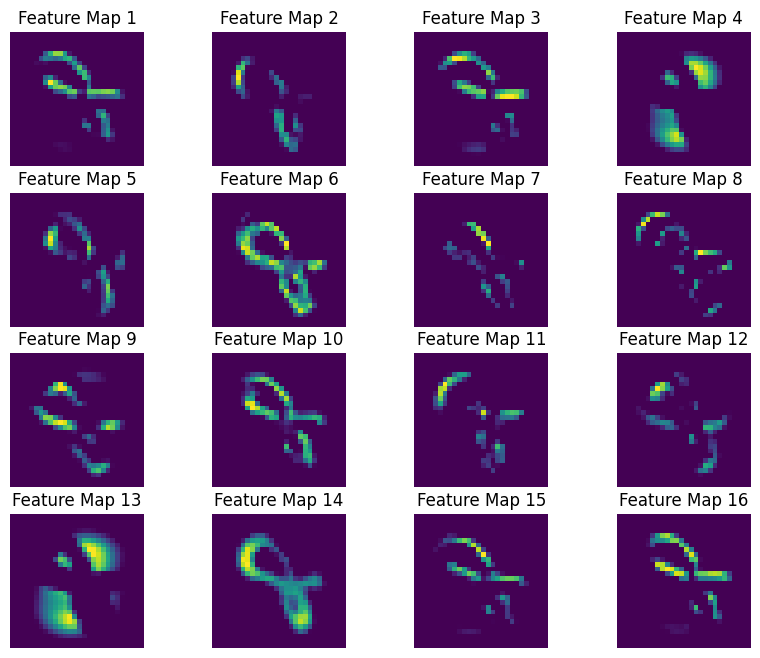

In [29]:
# Create a new model to get the output of the first convolutional layer
model_conv = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)

# Get the feature maps for a random image from the test set
feature_maps = model_conv.predict([x])

# Visualize the 16 feature maps
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')

plt.show()


**Q:** Do the same with the output of the first max-pooling layer.

*Hint:* you need to find the index of that layer in `model.summary()`.

1/1 [==============================] - 0s 76ms/step


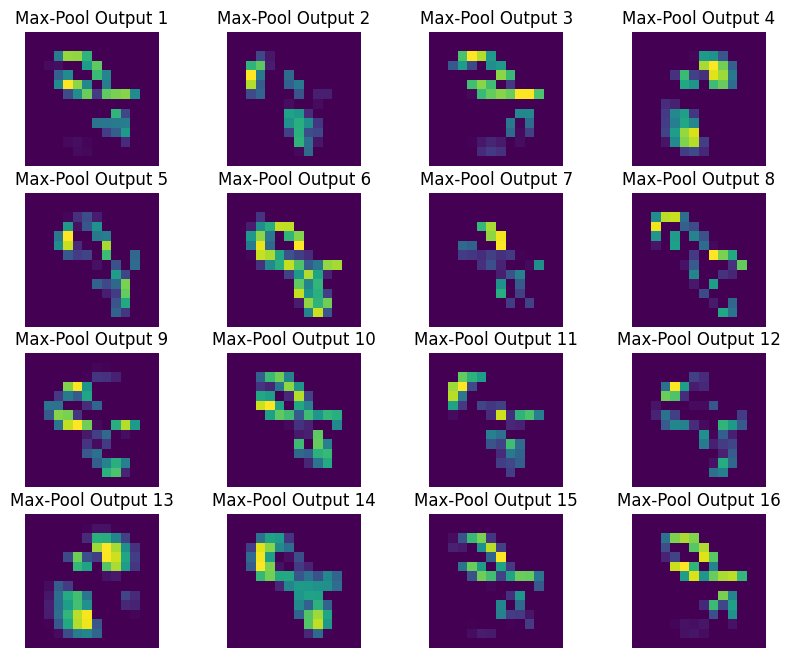

In [30]:
# Create a new model to get the output of the first max-pooling layer
model_maxpool = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)

# Get the output of the first max-pooling layer for a random image from the test set
maxpool_output = model_maxpool.predict([x])

# Visualize the output of the first max-pooling layer
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(maxpool_output[0, :, :, i], cmap='viridis')
    plt.title(f'Max-Pool Output {i+1}')
    plt.axis('off')

plt.show()


**Bonus question:** if you had several convolutional layers in your network, visualize them too. What do you think of the specificity of some features?

1/1 [==============================] - 0s 132ms/step


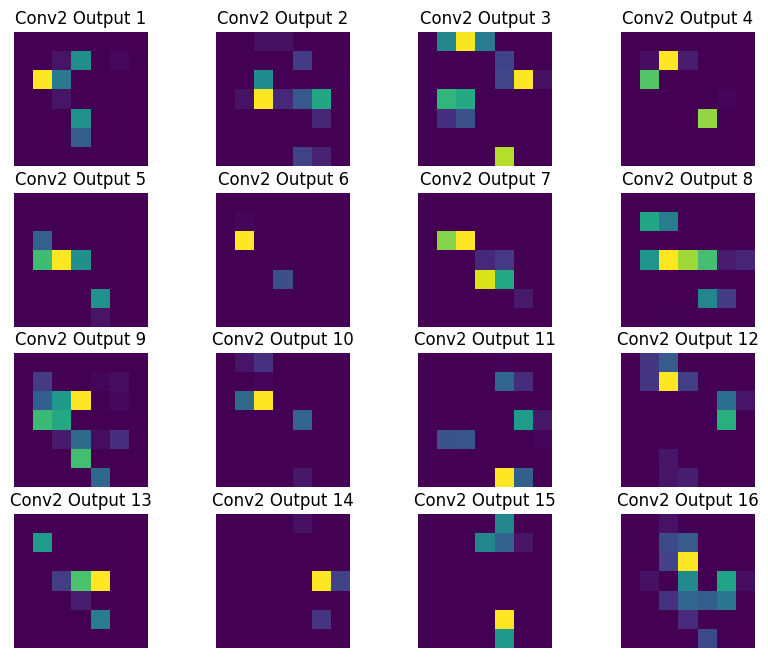

In [31]:
# Create a new model to get the output of the second convolutional layer
model_conv2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[4].output)

# Get the output of the second convolutional layer for a random image from the test set
conv2_output = model_conv2.predict([x])

# Visualize the output of the second convolutional layer
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv2_output[0, :, :, i], cmap='viridis')
    plt.title(f'Conv2 Output {i+1}')
    plt.axis('off')

plt.show()
